## Домашнее задание к лекции "Базовые понятия статистики"
### Обязательная часть
Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики.

### Задание 1. Базовое изучение
Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами
В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками
Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

### Дополнительная часть (необязательная)
Выполнить задания 1-3 для всего набора данных.

### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий GitHub. Не сможем проверить или помочь, если вы пришлете:

файлы;
архивы;
скриншоты кода.
Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:
1) Что я делаю?
2) Какого результата я ожидаю?
3) Как фактический результат отличается от ожидаемого?
4) Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [131]:
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names = list (range (1,29))
#str (names)

In [85]:
#df = pd.read_csv('horse_data.csv', header=None, na_values='?', names = names).iloc[:,[0, 1, 8, 9, 12, 18, 19, 22]]
#df.head()

In [114]:
dfff = pd.read_csv('horse_data.csv', header=None, names = names).iloc[:,[0, 1, 8, 9, 12, 18, 19, 22]]
#dfff.head()

In [116]:
dfff.replace(['?'], np.nan,inplace=True)
#dfff.head()
#dfff.info()

In [96]:
rendf = dfff.rename(columns={1: "surgery", 2: "Age", 9: "mucous membranes", 
                           10: "capillary refill time", 13: "abdominal distension" , 
                           19: "packed cell volume", 20: "total protein", 23: "outcome" })
rendf.head()

,surgery,Age,mucous membranes,capillary refill time,abdominal distension,packed cell volume,total protein,outcome
0,2,1,NaN,2,4,45.00,8.40,2
1,1,1,4,1,2,50,85,3
2,2,1,3,1,1,33.00,6.70,1
3,1,9,6,2,4,48.00,7.20,2
4,2,1,6,2,NaN,74.00,7.40,2


In [97]:
rendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
surgery                  299 non-null object
Age                      300 non-null int64
mucous membranes         253 non-null object
capillary refill time    268 non-null object
abdominal distension     244 non-null object
packed cell volume       271 non-null object
total protein            267 non-null object
outcome                  299 non-null object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


In [117]:
cols = ['packed cell volume', 'total protein']
rendf[cols] = rendf[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#rendf.head()

In [118]:
rendf = rendf.astype({'Age': str})

In [119]:
rendf.head()

,surgery,Age,mucous membranes,capillary refill time,abdominal distension,packed cell volume,total protein,outcome
0,2,1,NaN,2,4,45.0,8.4,2
1,1,1,4,1,2,50.0,85.0,3
2,2,1,3,1,1,33.0,6.7,1
3,1,2,6,2,4,48.0,7.2,2
4,2,1,6,2,NaN,74.0,7.4,2


In [101]:
for col in rendf.columns:
    pct_missing = rendf[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

surgery - 0.3%
Age - 0.0%
mucous membranes - 15.7%
capillary refill time - 10.7%
abdominal distension - 18.7%
packed cell volume - 9.7%
total protein - 11.0%
outcome - 0.3%


In [103]:
print(max(rendf['total protein']))
print(min(rendf['total protein']))
print(rendf['total protein'].mean())
print(rendf['total protein'].mode()[0])
print(rendf['total protein'].median())

89.0
3.3
24.456928838951317
6.5
7.5


In [104]:
rendf.describe()

,packed cell volume,total protein
count,271.000000,267.000000
mean,46.295203,24.456929
std,10.419335,27.475009
min,23.000000,3.300000
25%,38.000000,6.500000
50%,45.000000,7.500000
75%,52.000000,57.000000
max,75.000000,89.000000


In [133]:
rendf.sort_values('packed cell volume').dropna()

,surgery,Age,mucous membranes,capillary refill time,abdominal distension,packed cell volume,total protein,outcome
190,1,1,4,1,1,23.0,6.7,1
65,1,1,3,1,2,26.0,72.0,1
189,1,1,1,1,1,30.0,6.0,1
140,1,1,1,1,1,31.0,7.3,1
128,1,1,3,1,3,31.0,61.0,3
...,...,...,...,...,...,...,...,...
173,1,1,5,2,3,69.0,8.6,2
231,2,1,6,1,1,72.0,6.4,2
49,2,1,5,2,2,73.0,5.5,2
35,2,1,3,2,3,73.0,8.4,3


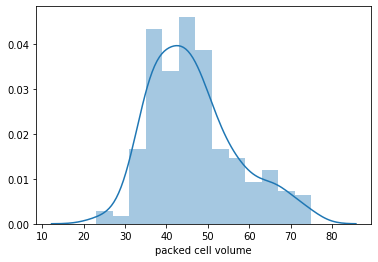

In [135]:
sns.distplot((rendf['packed cell volume']).dropna())

### Судя по графику, по показателю 'packed cell volume' нет выбросов

In [143]:
rendf.sort_values('total protein').dropna()

,surgery,Age,mucous membranes,capillary refill time,abdominal distension,packed cell volume,total protein,outcome
255,1,2,1,1,3,33.0,3.3,2
210,1,1,2,1,2,45.0,4.0,2
84,1,1,2,2,3,40.0,4.5,1
142,1,1,6,2,4,57.0,4.5,2
247,1,1,4,1,3,41.0,4.6,2
...,...,...,...,...,...,...,...,...
14,1,1,1,1,1,46.0,81.0,1
144,1,1,6,1,4,75.0,81.0,3
63,2,1,4,2,4,65.0,82.0,3
1,1,1,4,1,2,50.0,85.0,3


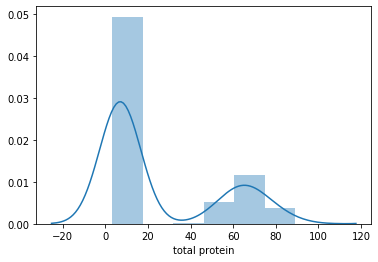

In [137]:
sns.distplot((rendf['total protein']).dropna())

#### по данному показателю распределение крайне неравномерное. в описании сказано, что нормальные значения находятся в диапазоне 6-7,5. Большая часть данных попадает в этот диапазон. Но и выпадающих данных слишком много, чтобы считать это случайной ошибкой ввода. Т.к. нет достаточных знаний в данной области, необходимо уточнить информацию у специалистов.

In [109]:
rendf['Age'].replace('9', '2', inplace=True)

In [110]:
rendf.head()

,surgery,Age,mucous membranes,capillary refill time,abdominal distension,packed cell volume,total protein,outcome
0,2,1,NaN,2,4,45.0,8.4,2
1,1,1,4,1,2,50.0,85.0,3
2,2,1,3,1,1,33.0,6.7,1
3,1,2,6,2,4,48.0,7.2,2
4,2,1,6,2,NaN,74.0,7.4,2


In [111]:
rendf.groupby(['Age']).count()

,surgery,mucous membranes,capillary refill time,abdominal distension,packed cell volume,total protein,outcome
Age,,,,,,,
1,275,237,250,229,248,245,275
2,24,16,18,15,23,22,24


In [124]:
rendf['Age'].value_counts()

1    276
2     24
Name: Age, dtype: int64

In [120]:
rendf['surgery'].value_counts()

1    180
2    119
Name: surgery, dtype: int64

In [144]:
rendf['outcome'].value_counts()

1    178
2     77
3     44
Name: outcome, dtype: int64

In [145]:
df_na = rendf.dropna()

In [146]:
df_na

,surgery,Age,mucous membranes,capillary refill time,abdominal distension,packed cell volume,total protein,outcome
1,1,1,4,1,2,50.0,85.0,3
2,2,1,3,1,1,33.0,6.7,1
3,1,2,6,2,4,48.0,7.2,2
6,1,1,1,1,3,37.0,7.0,1
8,2,1,3,1,4,38.0,6.2,3
...,...,...,...,...,...,...,...,...
291,1,1,3,1,3,54.0,6.5,2
292,1,1,2,1,3,35.0,6.9,2
294,2,1,1,1,1,37.0,67.0,1
297,1,1,4,1,3,60.0,6.8,2


In [147]:
df_na.describe()

,packed cell volume,total protein
count,206.000000,206.000000
mean,46.131068,22.655825
std,10.117592,26.913568
min,23.000000,3.300000
25%,39.000000,6.500000
50%,45.000000,7.350000
75%,51.000000,50.750000
max,75.000000,89.000000
